# Running tensorflow on Trade data

## Reading data from database

c:\Users\HamedNa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:title={'center':'Trade'}, xlabel='DateTimeEn'>

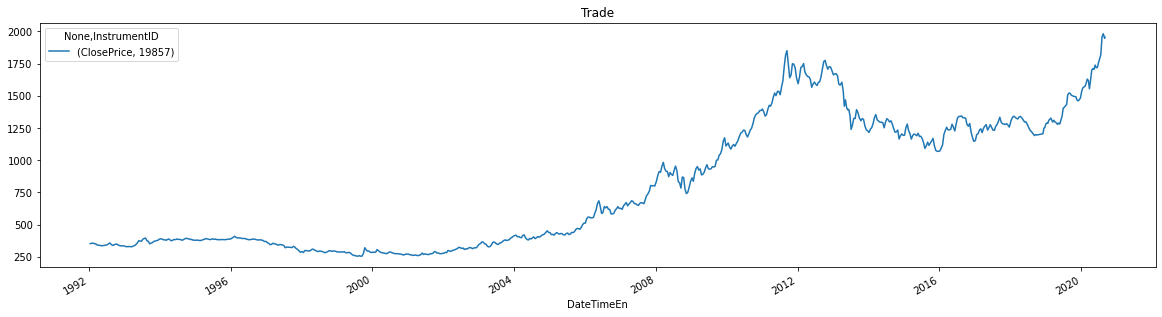

In [1]:
import codes.handlers as hd

rides = hd.ReadPanda('trade-graph', ("19857", 10, 0, 100000,))
rides = rides.pivot(index='DateTimeEn', columns='InstrumentID', values=['ClosePrice']) # 'OpenPrice', 'LowPrice', 'HighPrice', 
# print(rides.columns)
rides.plot(title='Trade', kind='line', figsize=(20, 5))

### Reading data to file

First , declareing the input and output data sizes:

In [2]:
INPUT_SIZE = 300
OUTPUT_SIZE = 10

Second, reading data from databse and store it in local files

In [3]:
import codes.trade as trade

loader = trade.TradeReader(INPUT_SIZE, OUTPUT_SIZE, 5)
loader.ReadData(ignore_existing=False)

The data already have read.


## Creating the model

In [4]:
import keras

DROPOUPT_VALUE = 0.2

model = keras.models.Sequential(name='logits')
model.add(keras.Input(shape=(INPUT_SIZE, 1, 1)))

model.add(keras.layers.Conv2D(3, (10, 1), strides=(2, 1), activation='gelu'))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))
model.add(keras.layers.Conv2D(6, (10, 1), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))
model.add(keras.layers.Conv2D(9, (5, 1), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(60, activation="gelu"))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))
model.add(keras.layers.Dense(OUTPUT_SIZE, activation="linear"))

model.compile(loss='mean_absolute_error', optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "logits"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 1, 3)         33        
                                                                 
 dropout (Dropout)           (None, 146, 1, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 1, 6)         186       
                                                                 
 dropout_1 (Dropout)         (None, 137, 1, 6)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 133, 1, 9)         279       
                                                                 
 dropout_2 (Dropout)         (None, 133, 1, 9)         0         
                                                                 
 flatten (Flatten)           (None, 1197)              0    

## Running tensorflow

In [5]:
import codes.handlers as hd

x_training = hd.LoadFile('trade-x', 4)
y_training = hd.LoadFile('trade-y', 4)

x_testing = hd.LoadFile('trade-x', 1, 5)
y_testing = hd.LoadFile('trade-y', 1, 5)

print("x_training.shape:", x_training.shape)
print("y_training.shape:", y_training.shape)

print("x_testing.shape:", x_testing.shape)
print("y_testing.shape:", y_testing.shape)

Loading trade-x-4.npy
Loading finished
Loading trade-y-4.npy
Loading finished
Loading trade-x-5.npy
Loading finished
Loading trade-y-5.npy
Loading finished
x_training.shape: (1299508, 300, 1)
y_training.shape: (1299508, 10)
x_testing.shape: (44262, 300, 1)
y_testing.shape: (44262, 10)


In [6]:
from keras.callbacks import ModelCheckpoint

check_point_path = 'models/trade-ver-1'

# train the model
checkpointer = ModelCheckpoint(filepath=check_point_path, 
                               verbose=1, save_best_only=True)

In [7]:
hist = model.fit(x_training, y_training, batch_size=512, epochs=1,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)


Epoch 1: val_loss improved from inf to 12679.84668, saving model to models\trade-ver-1


INFO:tensorflow:Assets written to: models\trade-ver-1\assets


INFO:tensorflow:Assets written to: models\trade-ver-1\assets
